In [ ]:
#importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pickle

In [ ]:
df_credit=pd.read_csv('train_home_loan.csv')
df_credit

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df=df_credit.copy()

In [271]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# on regarde la taille du tableau
df.shape

(614, 13)

In [ ]:
#on regarde le nombre de valeur manquantes
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
#visualisution des columnes
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#separation des variables catégoriques et des variables numériques
var_cat=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area', 'Loan_Status']
var_num=[ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term','Credit_History']

In [ ]:
#suppretion des valeurs manquantes coté cathegoriel
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
#pour les variables categorielles, on les remplaces par le mode

In [ ]:
#suppretion des valeurs manquantes coté numerique
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())
#pour les variables numeriques on les remplaces par la mediane

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


#Analyse univariée

1-La variable de sortie

In [ ]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [ ]:
df['Loan_Status'].value_counts(normalize=True)*100

,proportion
Loan_Status,
Y,68.729642
N,31.270358


<Axes: title={'center': 'verdict credit'}, xlabel='Loan_Status'>

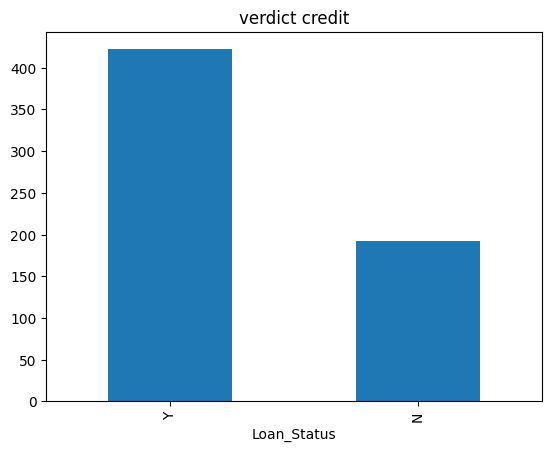

In [ ]:
df['Loan_Status'].value_counts().plot.bar(title='verdict credit')

#1- Les variables categorielles

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,502
Female,112


In [ ]:
df['Gender'].value_counts(normalize=True)*100

,proportion
Gender,
Male,81.758958
Female,18.241042


<Axes: title={'center': 'comparaison des sexes'}, xlabel='Gender'>

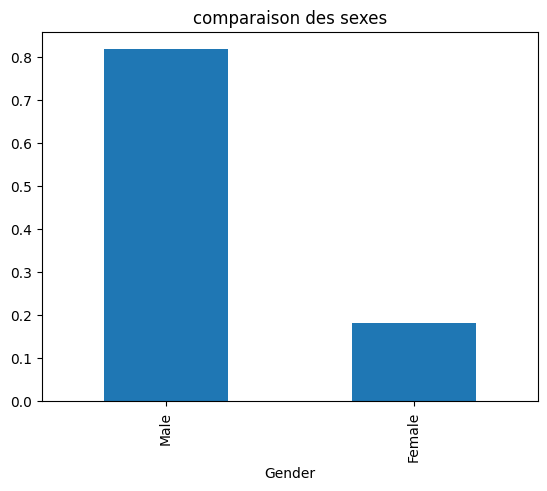

In [ ]:
df['Gender'].value_counts(normalize=True).plot.bar(title='comparaison des sexes')

In [ ]:
df['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


In [ ]:
df['Property_Area'].value_counts(normalize=True)*100

,proportion
Property_Area,
Semiurban,37.947883
Urban,32.899023
Rural,29.153094


<Axes: title={'center': "lieu d'habitation"}, xlabel='Property_Area'>

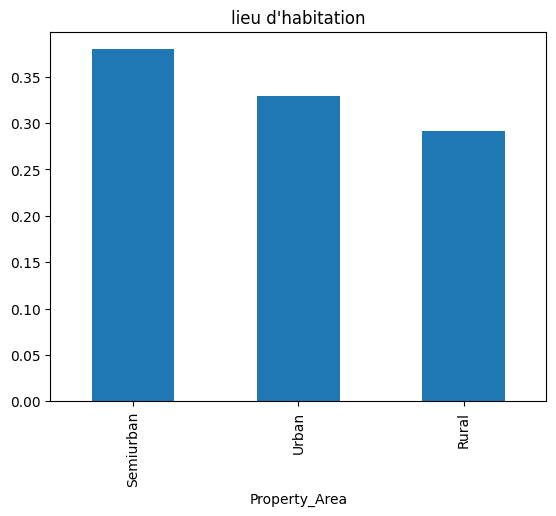

In [ ]:
df['Property_Area'].value_counts(normalize=True).plot.bar(title="lieu d'habitation")

In [ ]:
df['Married'].value_counts()

,count
Married,
Yes,401
No,213


In [ ]:
df['Married'].value_counts(normalize=True)*100

,proportion
Married,
Yes,65.309446
No,34.690554


<Axes: title={'center': 'situation amoureuse'}, xlabel='Married'>

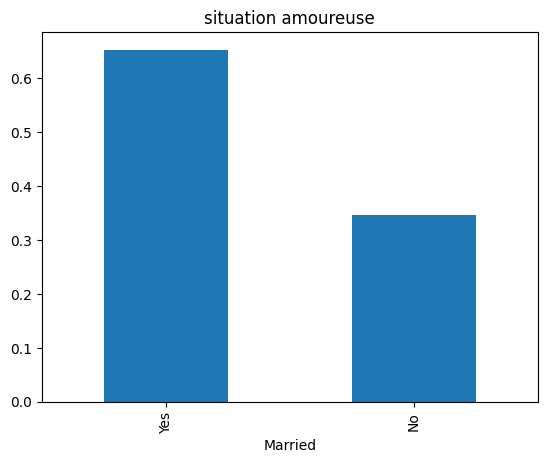

In [ ]:
df['Married'].value_counts(normalize=True).plot.bar(title="situation amoureuse")

In [ ]:
df['Education'].value_counts()

,count
Education,
Graduate,480
Not Graduate,134


In [ ]:
df['Education'].value_counts(normalize=True)*100

,proportion
Education,
Graduate,78.175896
Not Graduate,21.824104


<Axes: title={'center': "niveau d'etude"}, xlabel='Education'>

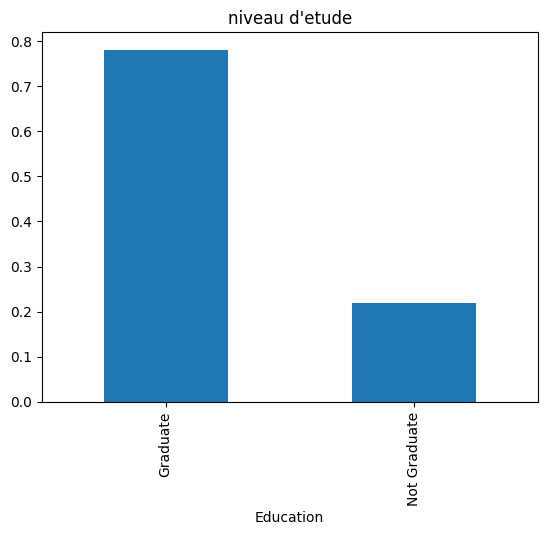

In [ ]:
df['Education'].value_counts(normalize=True).plot.bar(title="niveau d'etude")

In [ ]:
df['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
3+,51


In [ ]:
df['Dependents'].value_counts(normalize=True)*100

,proportion
Dependents,
0,58.631922
1,16.612378
2,16.449511
3+,8.306189


<Axes: title={'center': 'Dependents'}, xlabel='Dependents'>

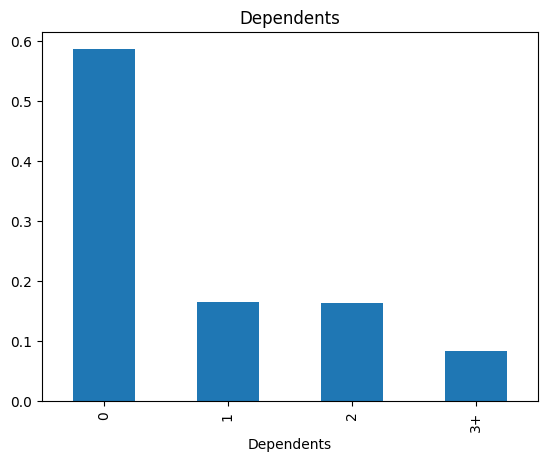

In [ ]:
df['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')

In [ ]:
df['Self_Employed'].value_counts()

,count
Self_Employed,
No,532
Yes,82


In [ ]:
df['Self_Employed'].value_counts(normalize=True)*100

,proportion
Self_Employed,
No,86.644951
Yes,13.355049


<Axes: title={'center': 'Self_Employed'}, xlabel='Self_Employed'>

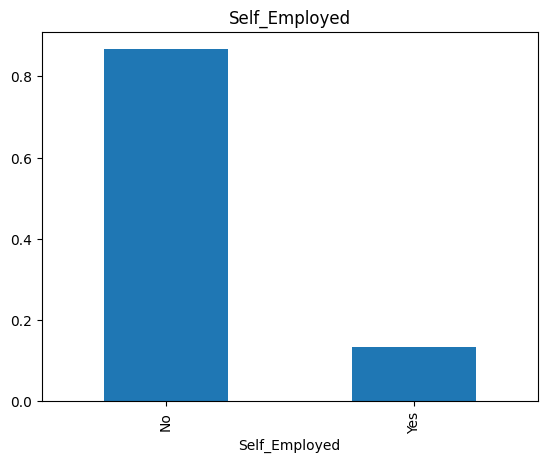

In [ ]:
df['Self_Employed'].value_counts(normalize=True).plot.bar(title="Self_Employed")

#2- les variables numeriques

In [ ]:
df[var_num]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [ ]:
#on affiche des valeurs statistiques clées
df[var_num].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


On aura:

📈 À gauche : la distribution (histogramme + densité)

📦 À droite : le box plot pour visualiser les valeurs extrêmes et la dispersion

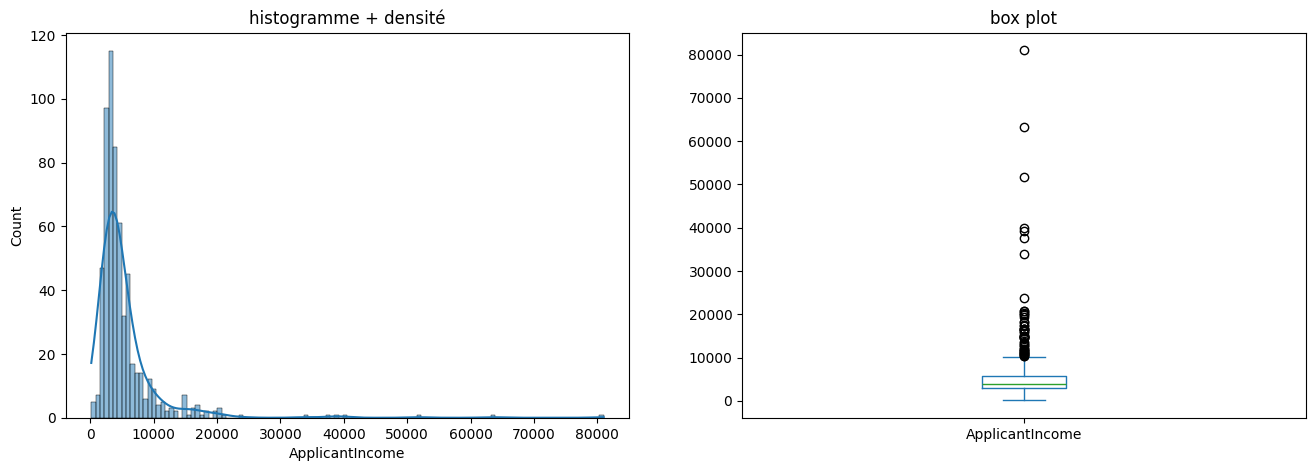

In [ ]:
# ApplicantIncome

plt.figure(1,figsize=(16,5))

plt.subplot(121)
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('histogramme + densité')

plt.subplot(122)
df['ApplicantIncome'].plot.box()
plt.title('box plot')


plt.show()

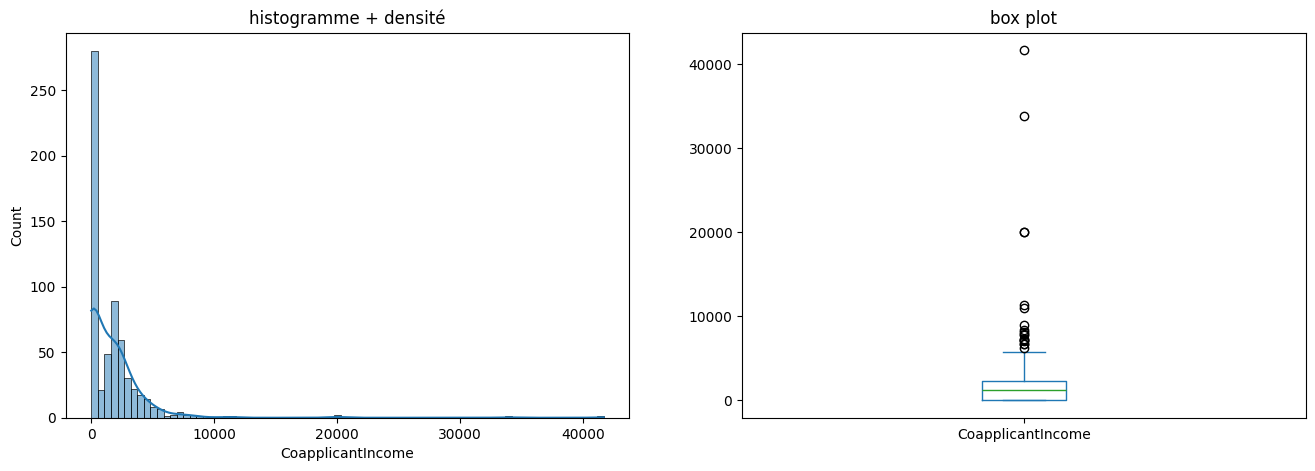

In [ ]:
# CoapplicantIncome

plt.figure(1,figsize=(16,5))

plt.subplot(121)
sns.histplot(df['CoapplicantIncome'], kde=True)
plt.title('histogramme + densité')

plt.subplot(122)
df['CoapplicantIncome'].plot.box()
plt.title('box plot')


plt.show()

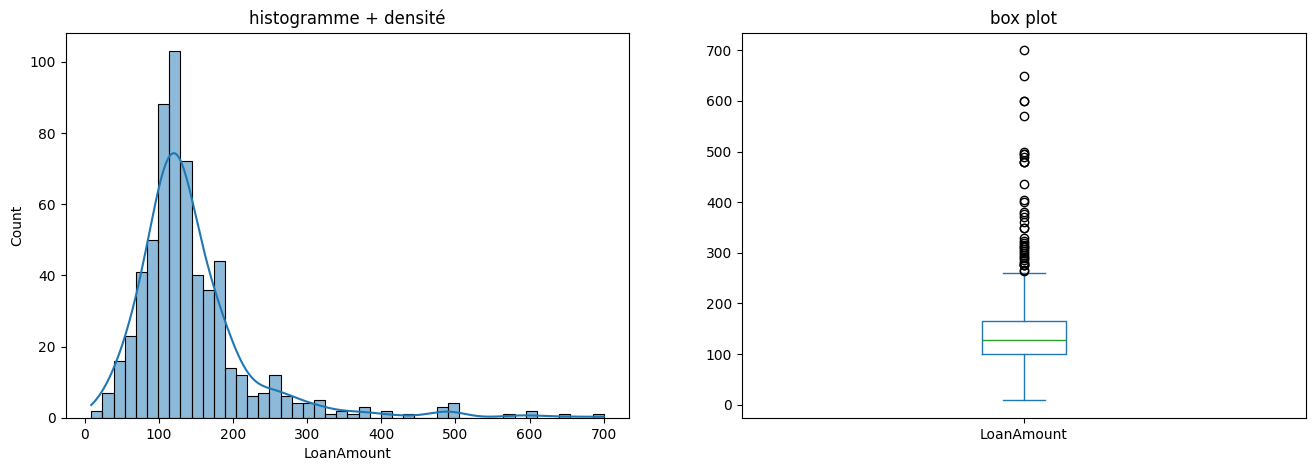

In [ ]:
# LoanAmount

plt.figure(1,figsize=(16,5))

plt.subplot(121)
sns.histplot(df['LoanAmount'], kde=True)
plt.title('histogramme + densité')

plt.subplot(122)
df['LoanAmount'].plot.box()
plt.title('box plot')


plt.show()

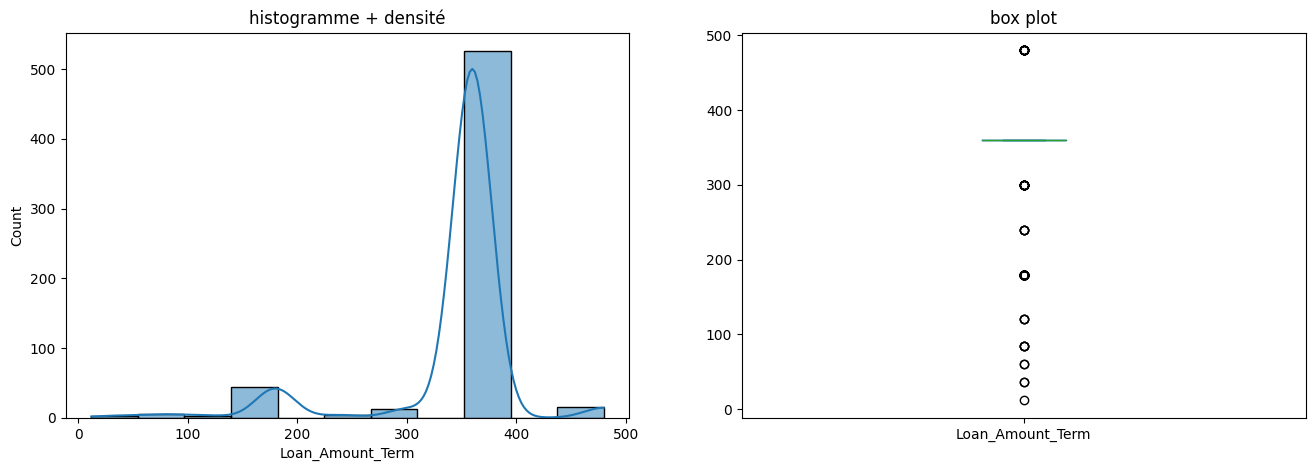

In [ ]:
# LoanAmount-Term

plt.figure(1,figsize=(16,5))

plt.subplot(121)
sns.histplot(df['Loan_Amount_Term'], kde=True)
plt.title('histogramme + densité')

plt.subplot(122)
df['Loan_Amount_Term'].plot.box()
plt.title('box plot')


plt.show()

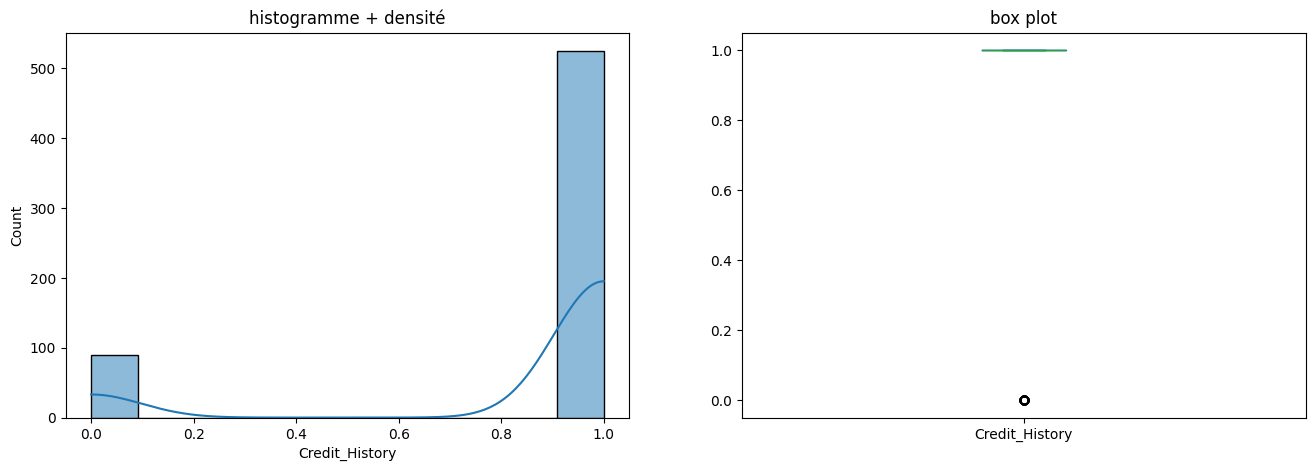

In [ ]:
#Credit_History
plt.figure(1,figsize=(16,5))

plt.subplot(121)
sns.histplot(df['Credit_History'], kde=True)
plt.title('histogramme + densité')

plt.subplot(122)
df['Credit_History'].plot.box()
plt.title('box plot')


plt.show()

##Analyse bivariée

In [ ]:
#on a pas besoin d'etudier la colmne Loan_status en fonction d'elle mème.Donc on ne la considère plus ici.
var_cat_num=['Credit_History', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']

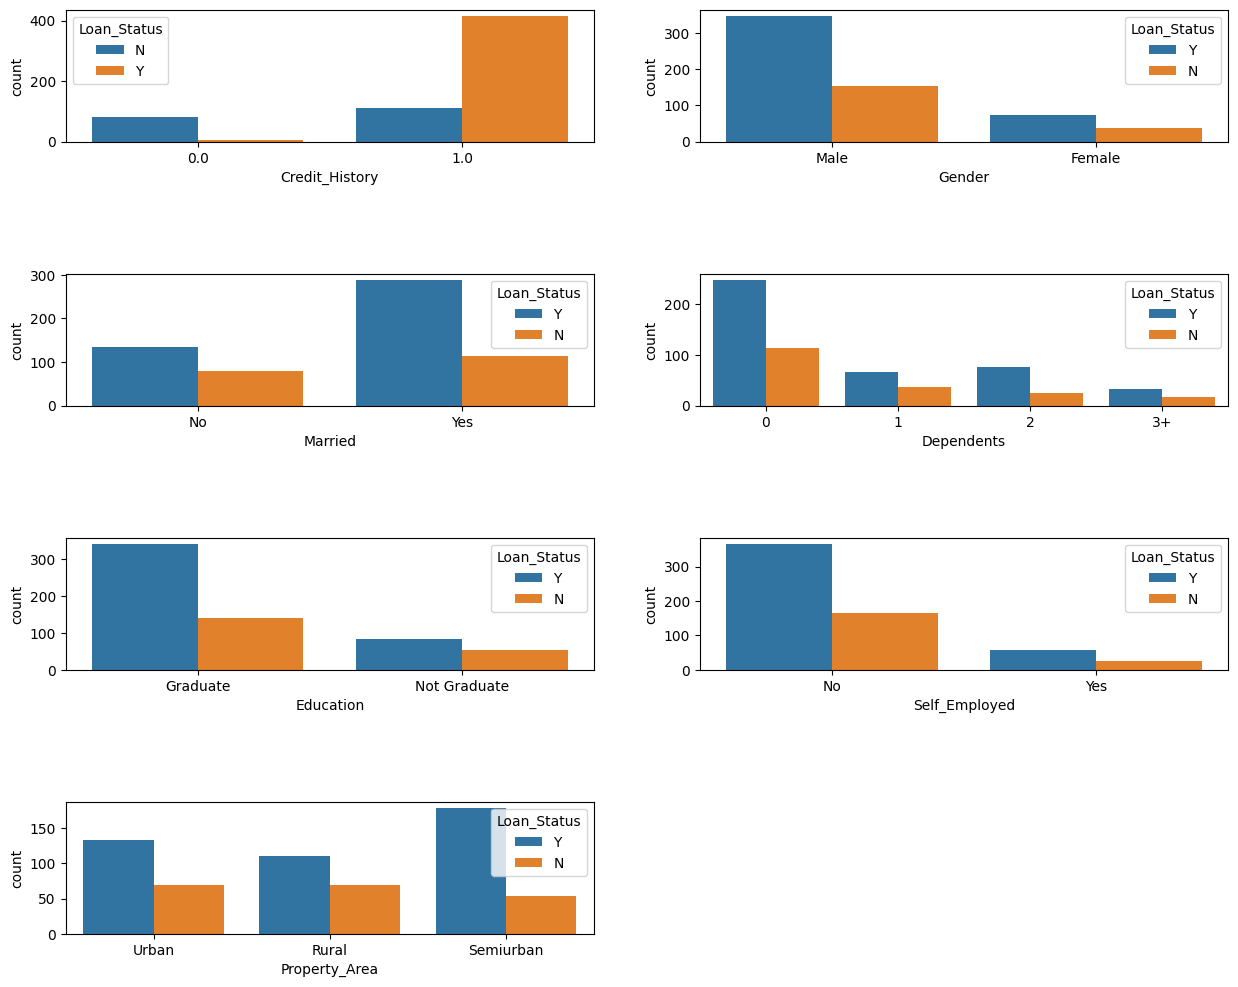

In [ ]:
# les variables categoriques et numeriques pertinentes

fig,axes=plt.subplots(4,2,figsize=(15,12))
for idx,cat_col in enumerate(var_cat_num):
  row,col=idx//2,idx%2
  sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])
  plt.subplots_adjust(hspace=1)
for i in range(len(var_cat_num), 4 * 2):#on masque le dernier graphe vide
        fig.axes[i].set_visible(False)


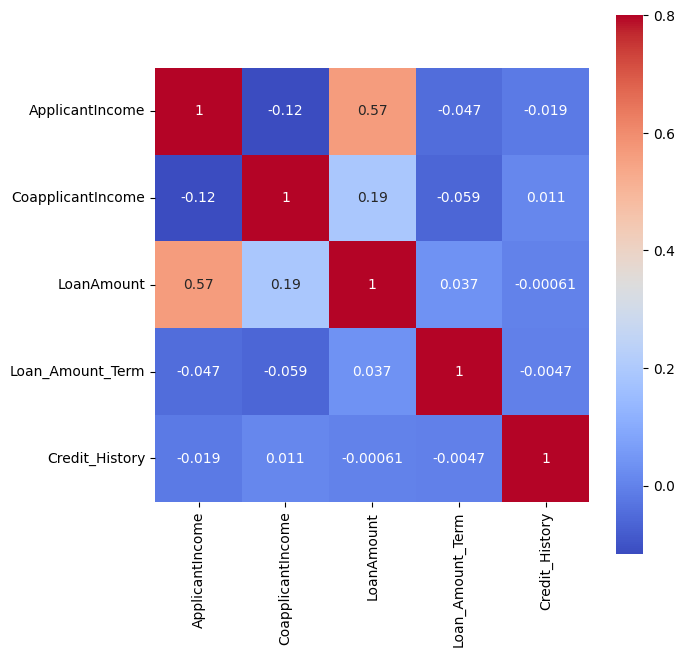

In [ ]:
# Corrélation des variables numériques

matrix = df[var_num].corr()

# Créer la figure et les axes
f, ax = plt.subplots(figsize=(7,7))

# Affichage de la heatmap
sns.heatmap(matrix, vmax=0.8, square=True, cmap='coolwarm', annot=True)

# Afficher le graphe
plt.show()

##Génération de modèle de regression linéaire

In [ ]:
df_cat=df[var_cat]
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [ ]:
#on transforme les variables categorielles en variable numeriques
df_cat = pd.get_dummies(df_cat, drop_first=True).astype(int)
df_cat

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,0,0,0,0,0,0,1,1
1,1,1,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1,1
3,1,1,0,0,0,1,0,0,1,1
4,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,1
610,1,1,0,0,1,0,0,0,0,1
611,1,1,1,0,0,0,0,0,1,1
612,1,1,0,1,0,0,0,0,1,1


In [ ]:
#on concatène les deux types de variables
df_concat=pd.concat([df_cat,df[var_num]],axis=1)
df_concat

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,0,0,0,1,1,5849,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.0,360.0,1.0
2,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.0,360.0,1.0
3,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,0,0,0,1,1,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,1,2900,0.0,71.0,360.0,1.0
610,1,1,0,0,1,0,0,0,0,1,4106,0.0,40.0,180.0,1.0
611,1,1,1,0,0,0,0,0,1,1,8072,240.0,253.0,360.0,1.0
612,1,1,0,1,0,0,0,0,1,1,7583,0.0,187.0,360.0,1.0


In [ ]:
Y=df_concat['Loan_Status_Y']
Y

,Loan_Status_Y
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [ ]:
X=df_concat.drop('Loan_Status_Y',axis=1)
X

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,0,0,0,1,5849,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,0,0,0,4583,1508.0,128.0,360.0,1.0
2,1,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0,1.0
3,1,1,0,0,0,1,0,0,1,2583,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,0,0,0,1,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,2900,0.0,71.0,360.0,1.0
610,1,1,0,0,1,0,0,0,0,4106,0.0,40.0,180.0,1.0
611,1,1,1,0,0,0,0,0,1,8072,240.0,253.0,360.0,1.0
612,1,1,0,1,0,0,0,0,1,7583,0.0,187.0,360.0,1.0


In [ ]:
#on separe les donnés en packets train et test
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=6 )

In [ ]:
#on normalise les donneés
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
#on implemente l'algorithme
clf = LogisticRegression()
#on l'entraine
clf.fit(x_train_scaled, y_train)


LogisticRegression()

In [ ]:
x_train_scaled

array([[ 0.48979484,  0.71468121, -0.44775998, ..., -0.80561258,
        -2.44804832,  0.42125768],
       [ 0.48979484,  0.71468121,  2.2333394 , ...,  0.14371202,
         0.28665149,  0.42125768],
       [ 0.48979484,  0.71468121, -0.44775998, ...,  2.45913788,
         0.28665149, -2.37384396],
       ...,
       [ 0.48979484,  0.71468121, -0.44775998, ..., -0.89822961,
         0.28665149,  0.42125768],
       [ 0.48979484, -1.39922526, -0.44775998, ..., -0.16887047,
         0.28665149,  0.42125768],
       [ 0.48979484,  0.71468121, -0.44775998, ...,  0.72256849,
         0.28665149,  0.42125768]])

In [ ]:
x_test_scaled

array([[ 0.48979484,  0.71468121, -0.44775998, ..., -0.22675611,
         0.28665149, -2.37384396],
       [ 0.48979484,  0.71468121, -0.44775998, ...,  0.02794073,
         0.28665149,  0.42125768],
       [ 0.48979484,  0.71468121, -0.44775998, ..., -0.15729334,
         0.28665149,  0.42125768],
       ...,
       [ 0.48979484,  0.71468121, -0.44775998, ..., -0.3772588 ,
        -2.44804832,  0.42125768],
       [-2.04167114, -1.39922526,  2.2333394 , ..., -0.41199018,
         0.28665149,  0.42125768],
       [ 0.48979484,  0.71468121, -0.44775998, ...,  0.06267212,
         0.28665149,  0.42125768]])

In [ ]:
#on teste l'algorithme
y_pred=clf.predict(x_test_scaled)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#on regarde la precision du modèle
accuracy_score(y_test,y_pred)*100

83.73983739837398

In [ ]:
#enregistrer le modèle
pickle.dump(clf,open('previson_credit.pkl','wb'))
